PYTN-KS16-KELOMPOK 4

* Andhar Siraj Munir
* M. Rizqi Yuwanto
* M. Sadam Abdillah



# 1. PERKENALAN

## 1.1. Latar Belakang

Strategi pemasaran adalah rencana atau langkah-langkah yang dirancang untuk mencapai tujuan pemasaran perusahaan diantaranya meningkatkan kesadaran, minat, dan pembelian produk atau layanan perusahaan. Strategi pemasaran yang tepat dengan segmentasi pasar yang sesuai sasaran sangat penting untuk mempengaruhi pertumbuhan kredit di era persaingan antar bank yang semakin tinggi.

## 1.2. Dataset

Dataset yang digunakan adalah dataset yang berjudul Credit [Card Dataset for Clustering](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata) yang berasal diambil dari website kaggle Credit Card Dataset for Clustering. Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan dengan 18 atribut.

## 1.3. Objektif Yang Ingin Dicapai

Objektif yang ingin dicapai antara lain:

Memahami konsep Clustering dengan menggunakan Scikit-Learn
Mempersiapkan data untuk digunakan dalam Clustering
Mengimplementasikan Clustering pada data yang diberikan

# 2. IMPORT LIBRARY

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

# 3. DATA LOADING

## 3.1 Load Data

In [2]:
# Mentransformasikan file yang ada di google drive
! gdown --id 1lZwakuiywscHJOOJvV5a3xw_9Ec6JoZj

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lZwakuiywscHJOOJvV5a3xw_9Ec6JoZj
To: /content/CC GENERAL.csv
100% 903k/903k [00:00<00:00, 75.9MB/s]


In [3]:
# Read Dataset
df = pd.read_csv('CC GENERAL.csv')
# Menampilkan Dataset
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# lowercase nama kolom
df.columns = map(str.lower, df.columns)
df

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# 4. Eksplorasi Data Analisis

Mengeksplor data train

## 4.1 Informasi Data

Menampilkan 5 data teratas

In [5]:
df.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Menampilkan 5 data terakhir

In [6]:
df.tail()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


Menampilkan dimensi dataset

In [7]:
df.shape

(8950, 18)

Terdapat 8950 baris dan 18 kolom pada dataset.

Menampilkan informasi detail

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

Dari informasi diatas terdapat 15 type data float, dan 3 type data int.

Menampilkan nama-nama kolom pada dataset

In [9]:
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

Menampilkan ringkasan statistik dari kolom data numerik

In [10]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Menampilkan nilai unik setiap kolom

In [11]:
df.nunique()

cust_id                             8950
balance                             8871
balance_frequency                     43
purchases                           6203
oneoff_purchases                    4014
installments_purchases              4452
cash_advance                        4323
purchases_frequency                   47
oneoff_purchases_frequency            47
purchases_installments_frequency      47
cash_advance_frequency                54
cash_advance_trx                      65
purchases_trx                        173
credit_limit                         205
payments                            8711
minimum_payments                    8636
prc_full_payment                      47
tenure                                 7
dtype: int64

Menampilkan missing value pada dataset

In [12]:
df.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [13]:
# Menghitung presentase missing values pada setiap atribut
df.apply(lambda x: f'{((x.isna().sum()/df.shape[0])*100).round(2)} %')

cust_id                              0.0 %
balance                              0.0 %
balance_frequency                    0.0 %
purchases                            0.0 %
oneoff_purchases                     0.0 %
installments_purchases               0.0 %
cash_advance                         0.0 %
purchases_frequency                  0.0 %
oneoff_purchases_frequency           0.0 %
purchases_installments_frequency     0.0 %
cash_advance_frequency               0.0 %
cash_advance_trx                     0.0 %
purchases_trx                        0.0 %
credit_limit                        0.01 %
payments                             0.0 %
minimum_payments                     3.5 %
prc_full_payment                     0.0 %
tenure                               0.0 %
dtype: object

In [14]:
# Daftar karakter yang digunakan untuk mengidentifikasi kekosongan
karakter_kosong = []

for kolom in df.columns:  # Mengganti 'df' dengan nama DataFrame Anda
    for nilai in df[kolom]:
        if pd.isna(nilai):
            continue  # Skip jika sudah NaN
        elif isinstance(nilai, str) and not nilai.strip():  # Periksa apakah string kosong atau hanya berisi spasi
            karakter_kosong.append(nilai)

karakter_kosong_unik = set(karakter_kosong)

print("Karakter yang mewakili kekosongan:", karakter_kosong_unik)

Karakter yang mewakili kekosongan: set()


Menampilkan data duplikat

In [15]:
df.duplicated().sum()

0

## 4.2 Histogram Dataset

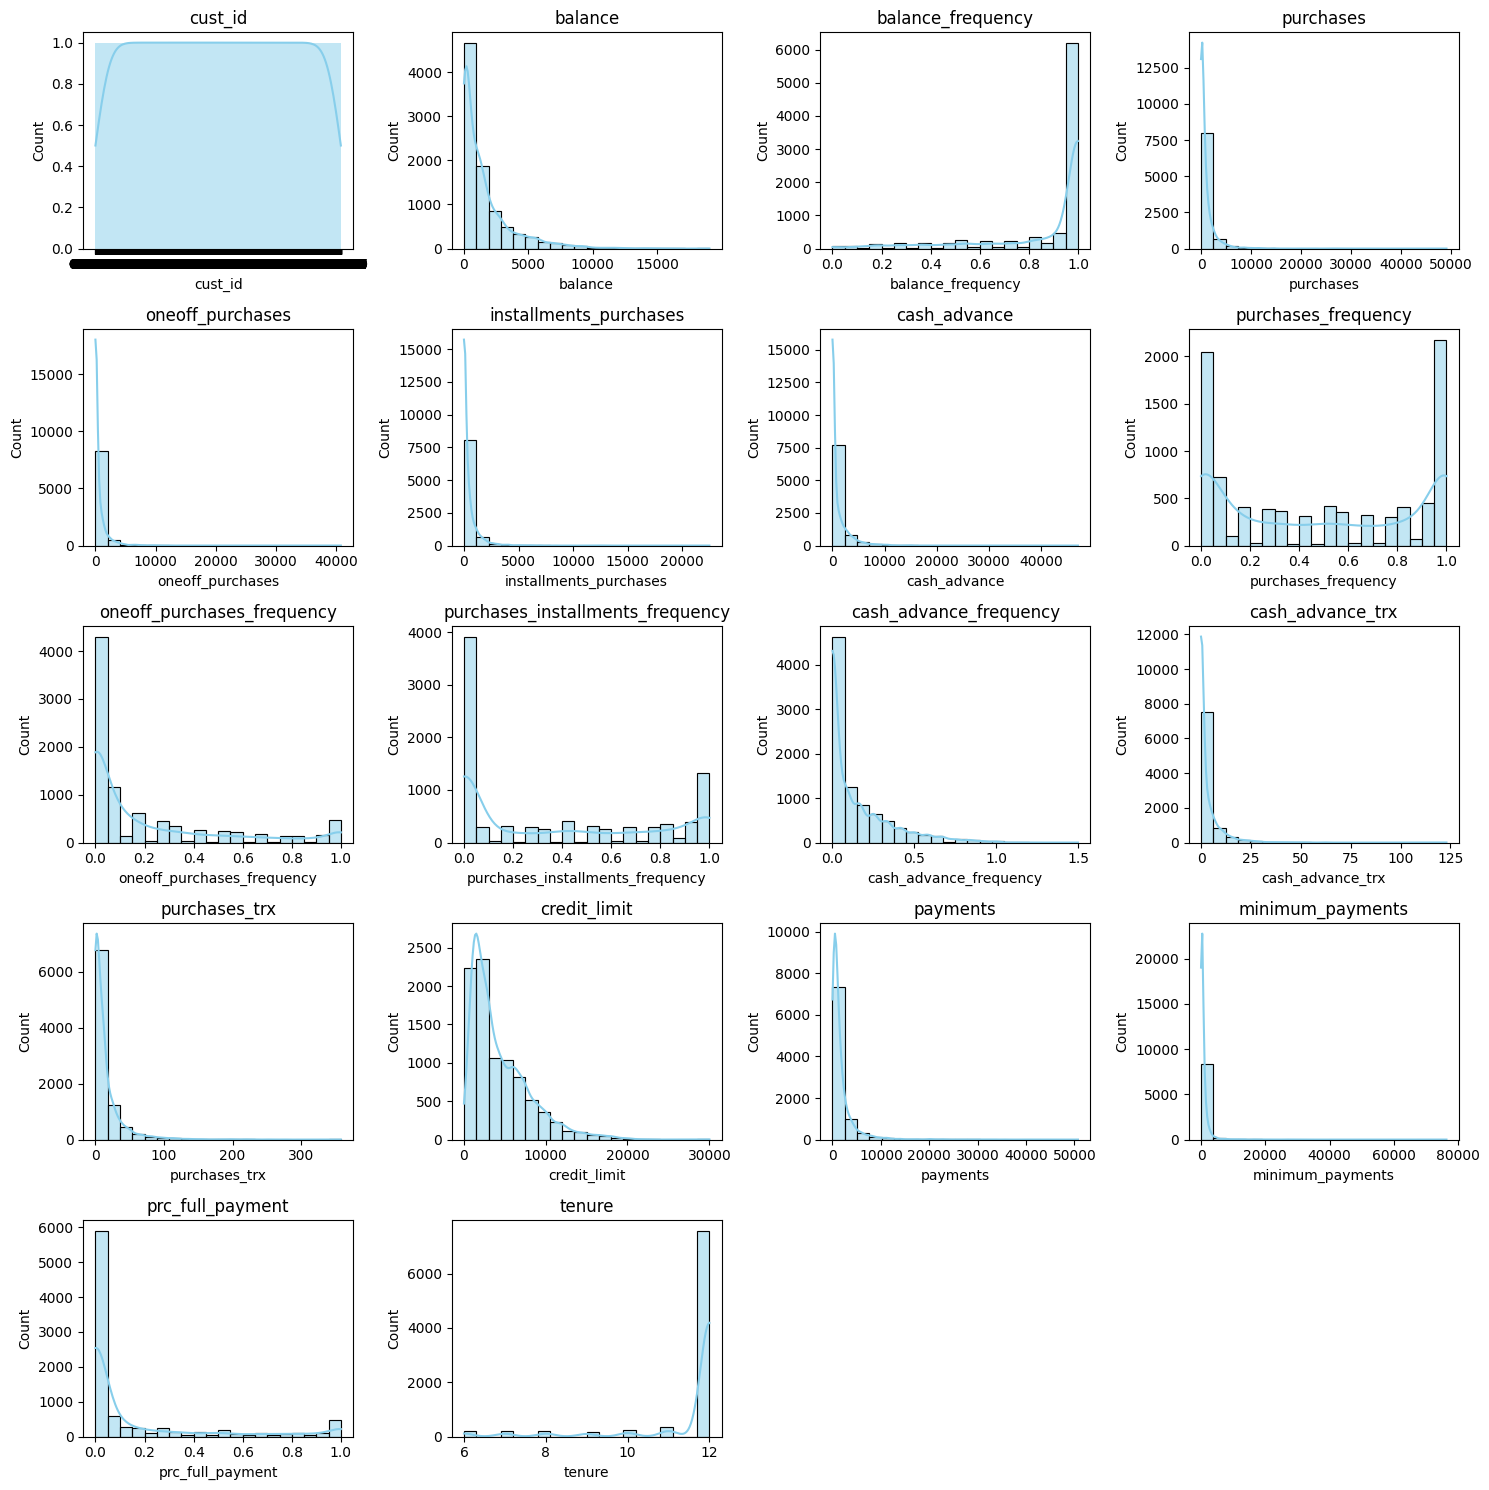

In [16]:
# Memilih kolom-kolom untuk visualisasi
columns_to_visualize = df.columns

# Mengatur ukuran subplot berdasarkan jumlah kolom
num_cols = len(columns_to_visualize)
num_subplot_cols = 4
num_subplot_rows = -(-num_cols // num_subplot_cols)  # Pembulatan ke atas

# Membuat histogram
fig, axes = plt.subplots(num_subplot_rows, num_subplot_cols, figsize=(15, 3 * num_subplot_rows))  # Sesuaikan ukuran berdasarkan kebutuhan

for i, col in enumerate(columns_to_visualize):
    ax = axes[i // num_subplot_cols, i % num_subplot_cols]
    sns.histplot(df[col].dropna(), bins=20, kde=True, color='skyblue', ax=ax)
    ax.set_title(col)

# Menghilangkan subplot yang tidak digunakan
for i in range(num_cols, num_subplot_cols * num_subplot_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [17]:
df.skew()

balance                              2.393386
balance_frequency                   -2.023266
purchases                            8.144269
oneoff_purchases                    10.045083
installments_purchases               7.299120
cash_advance                         5.166609
purchases_frequency                  0.060164
oneoff_purchases_frequency           1.535613
purchases_installments_frequency     0.509201
cash_advance_frequency               1.828686
cash_advance_trx                     5.721298
purchases_trx                        4.630655
credit_limit                         1.522464
payments                             5.907620
minimum_payments                    13.622797
prc_full_payment                     1.942820
tenure                              -2.943017
dtype: float64

Berdasarkan grafik histogram dan nilai skewness pada setiap kolom dalam dataset, kita dapat menggambarkan karakteristik distribusi dari masing-masing variabel. Berikut adalah kesimpulan secara keseluruhan:

Variabel dengan Skewness Positif Tinggi:
oneoff_purchases, minimum_payments, purchases, cash_advance, cash_advance_trx, purchases_trx, credit_limit, dan payments memiliki skewness positif yang tinggi.
Kesimpulan: Distribusi data pada variabel ini condong ke kanan dengan ekor panjang di sebelah kanan, menunjukkan adanya nilai ekstrem yang tinggi.

Variabel dengan Skewness Positif Sedang:
oneoff_purchases_frequency, purchases_installments_frequency, cash_advance_frequency, percentage_full_payment memiliki skewness positif yang menunjukkan kecenderungan distribusi ke kanan.
Kesimpulan: Distribusi data pada variabel ini condong ke kanan, tetapi tidak sekuat variabel dengan skewness positif tinggi.

Variabel dengan Skewness Negatif:
balance_frequency dan tenure memiliki skewness negatif.
Kesimpulan: Distribusi data pada variabel ini condong ke kiri dengan ekor panjang di sebelah kiri, menunjukkan adanya nilai ekstrem yang rendah.

Variabel dengan Skewness Mendekati Nol:
purchases_frequency, purchases_installments_frequency memiliki skewness mendekati nol, menunjukkan distribusi data yang relatif simetris.
Kesimpulan: Distribusi data pada variabel ini mendekati simetris tanpa kecenderungan kuat ke kiri atau kanan.

## 4.3 Hubungan antar kolom (Scatter plot)

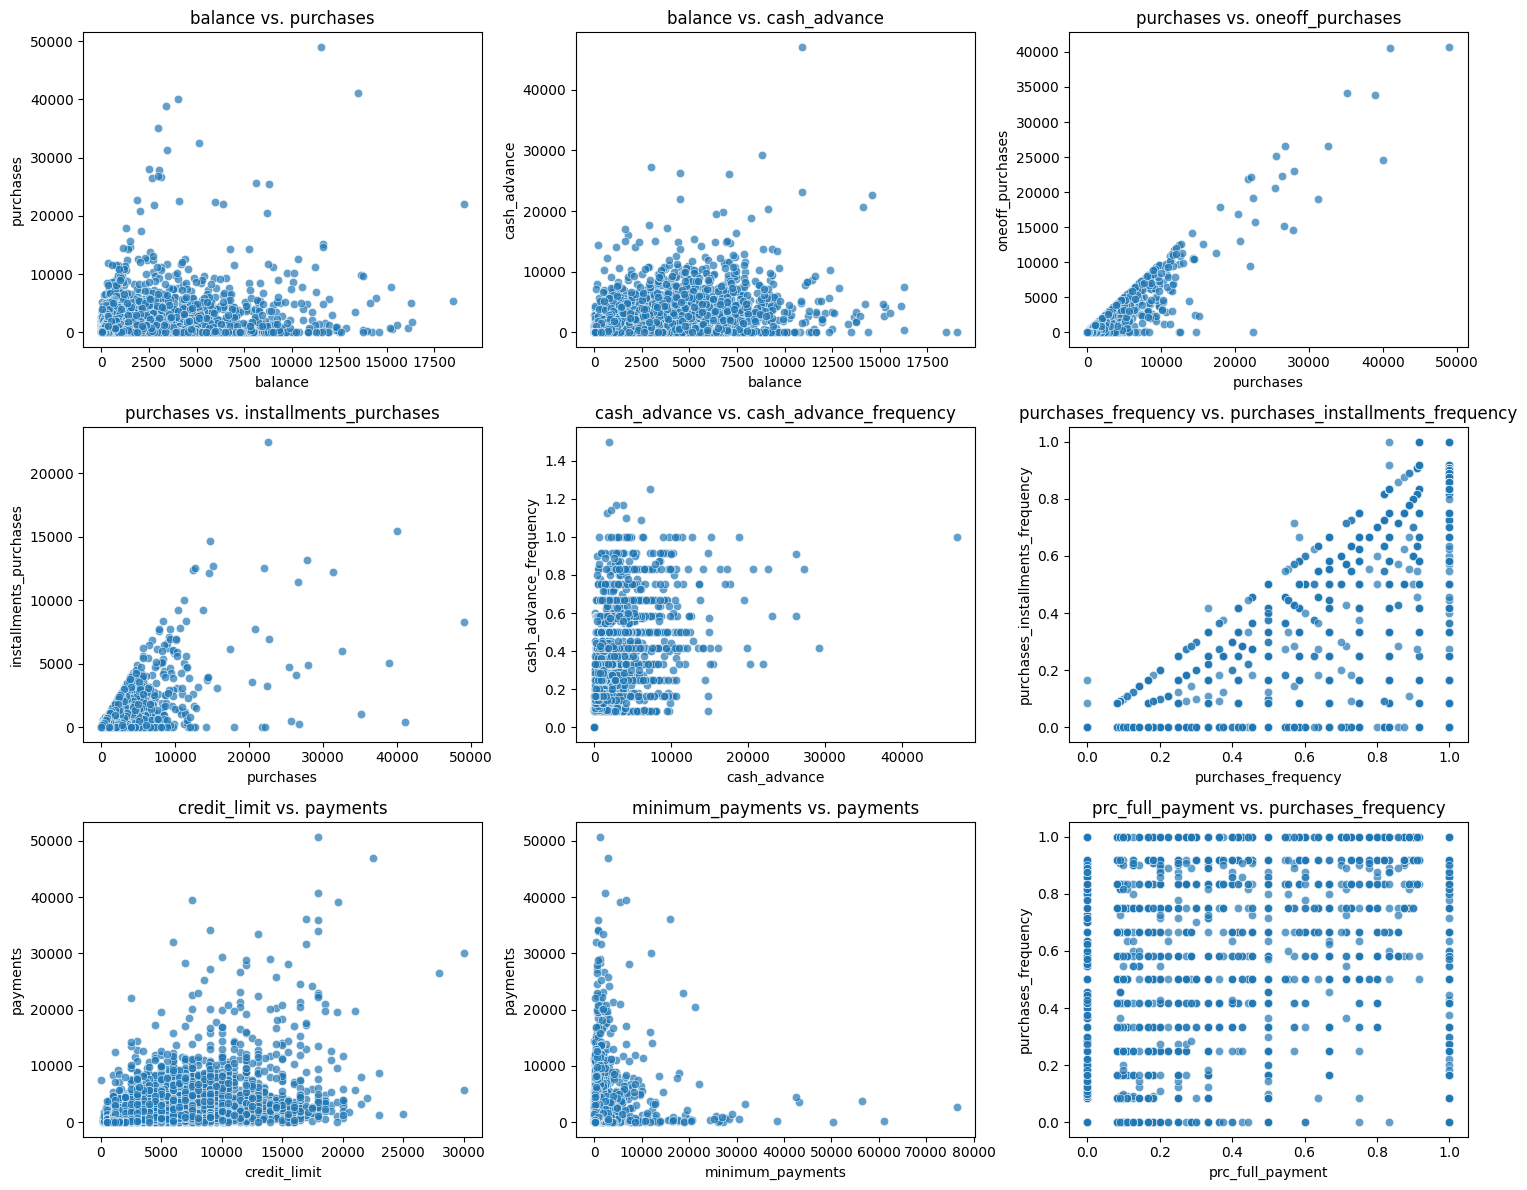

In [18]:
# List pasangan kolom yang ingin diplot
scatter_pairs = [('balance', 'purchases'), ('balance', 'cash_advance'), ('purchases', 'oneoff_purchases'),
                 ('purchases', 'installments_purchases'), ('cash_advance', 'cash_advance_frequency'),
                 ('purchases_frequency', 'purchases_installments_frequency'), ('credit_limit', 'payments'),
                 ('minimum_payments', 'payments'), ('prc_full_payment', 'purchases_frequency')]

# Membuat scatter plot
plt.figure(figsize=(15, 12))
for i, pair in enumerate(scatter_pairs, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=pair[0], y=pair[1], data=df, alpha=0.7)
    plt.title(f"{pair[0]} vs. {pair[1]}")
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

plt.tight_layout()
plt.show()

## 4.4 Box Plot

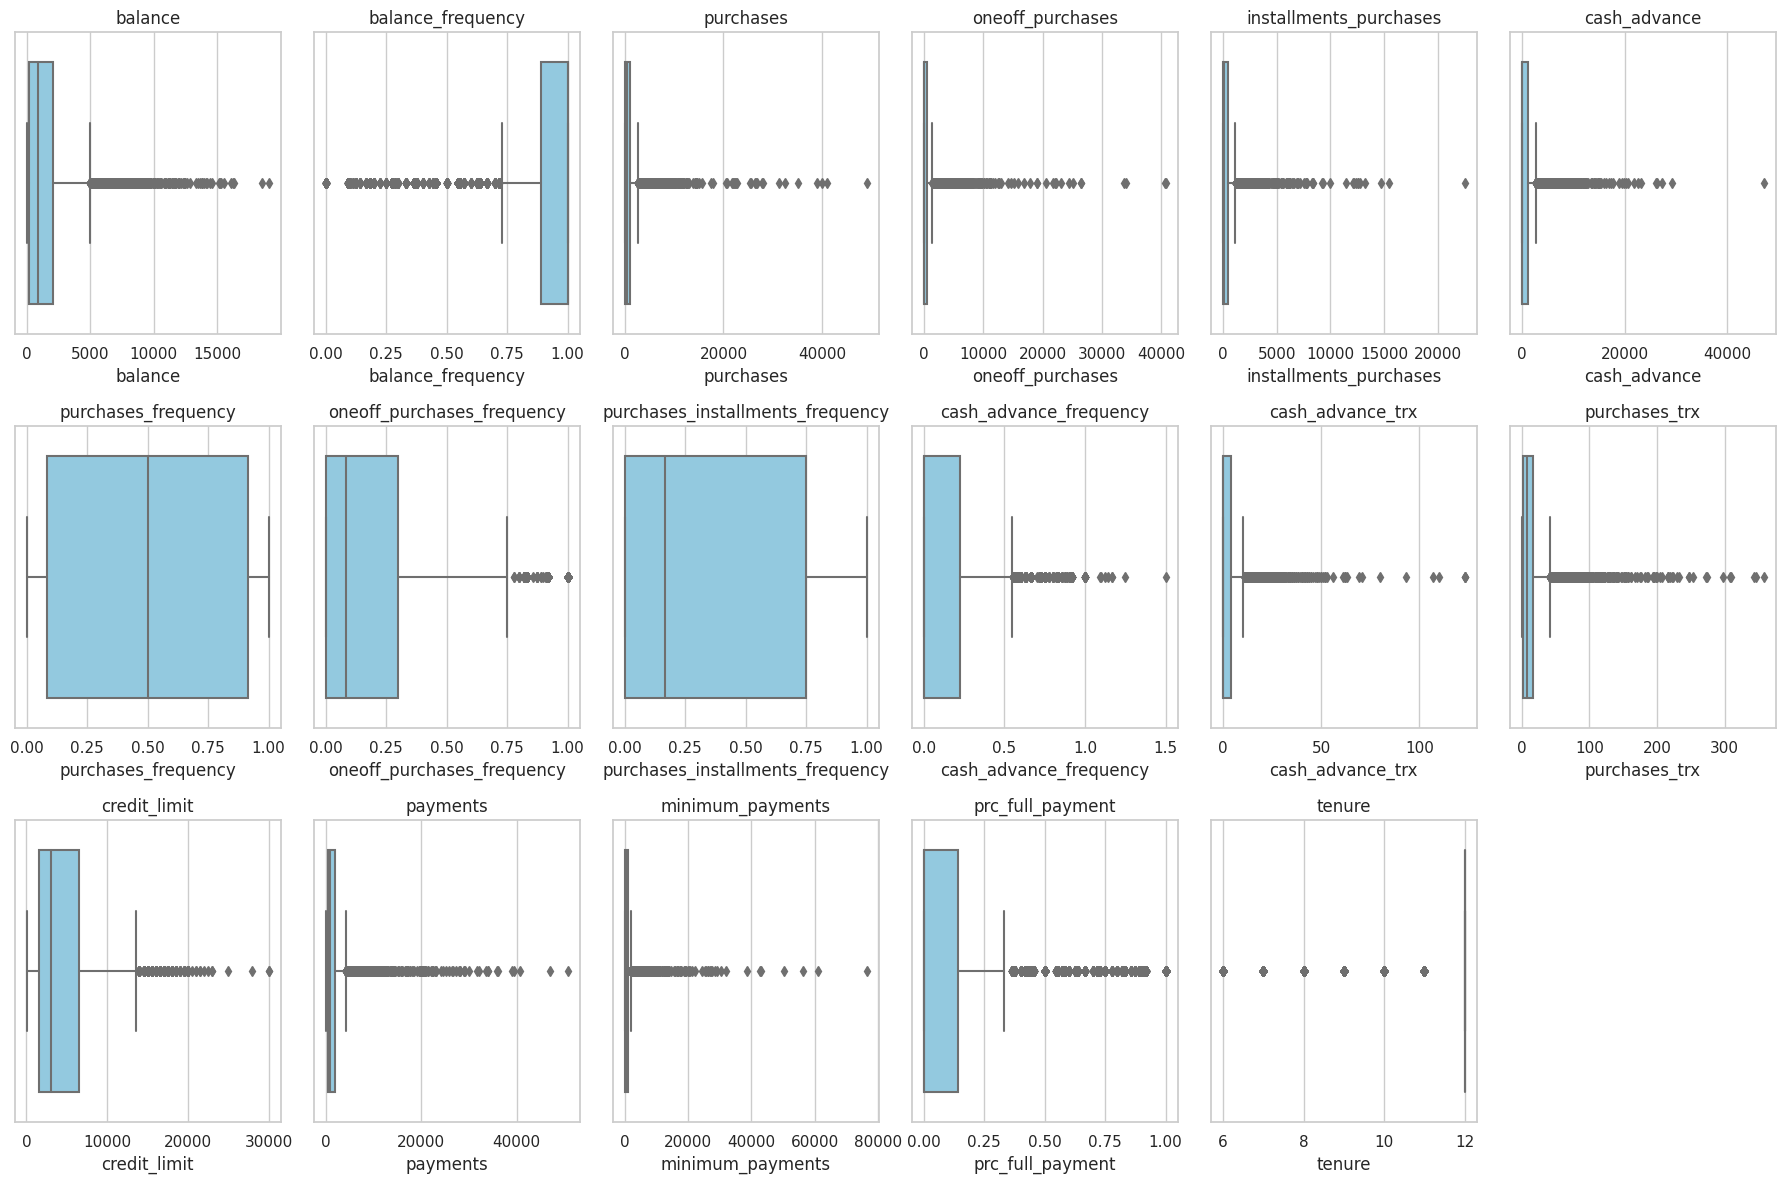

In [19]:
# List kolom yang ingin diplot
columns_to_plot = ['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
                   'installments_purchases', 'cash_advance', 'purchases_frequency',
                   'oneoff_purchases_frequency', 'purchases_installments_frequency',
                   'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
                   'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure']

# Membuat boxplot
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")  # Mengatur gaya plot

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

Tingkat variabilitas:
Variabel "Balance" dan "Credit Limit" memiliki kisaran nilai yang cukup besar, ditunjukkan oleh panjang jarak antara Q1 dan Q3.
Sebaliknya, variabel "Balance Frequency", "Purchases Frequency", "One-off Purchases Frequency", "Purchases Installments Frequency", dan "Cash Advance Frequency" memiliki distribusi frekuensi yang lebih terkonsentrasi di sekitar nilai median.

Pencilan (Outliers):
Variabel "Purchases", "One-off Purchases", "Installments Purchases", "Cash Advance", "Purchases Frequency", "One-off Purchases Frequency", "Purchases Installments Frequency", "Cash Advance Frequency", "Cash Advance Trx", "Purchases Trx", "Payments", dan "Minimum Payments" memiliki pencilan di atas Upper Whisker.

## 4.5 Metrik Korelasi

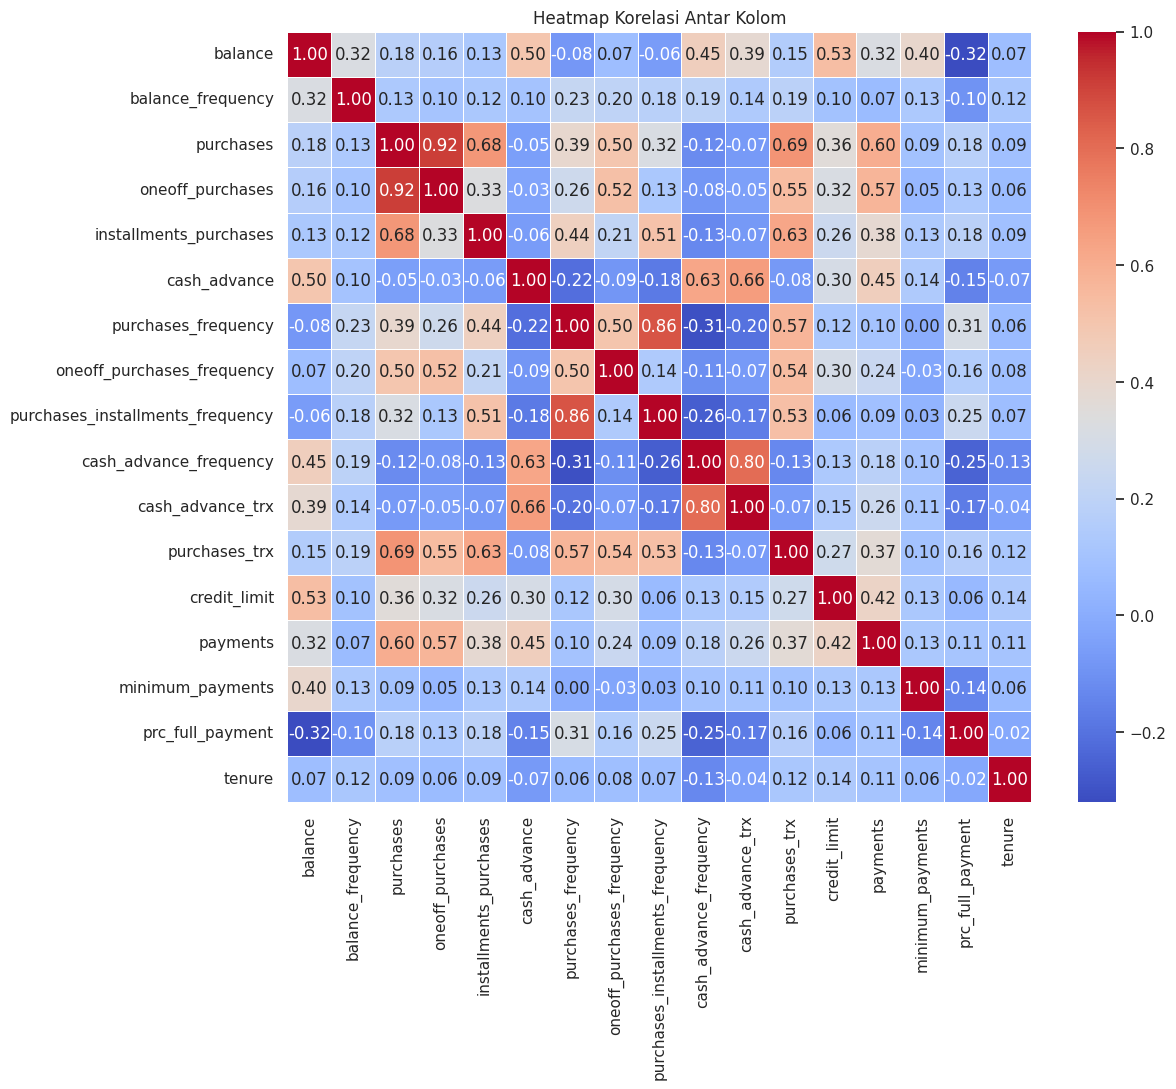

In [20]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Kolom")
plt.show()

Balance dan Cash Advance:
Korelasi positif yang kuat antara balance dan cash_advance (0.50). Ini menunjukkan bahwa pemegang kartu dengan saldo yang tinggi cenderung melakukan lebih banyak penarikan uang tunai.

Purchases dan One-off Purchases:
Korelasi yang sangat tinggi antara purchases dan oneoff_purchases (0.92). Hal ini menunjukkan bahwa sebagian besar pembelian adalah one-off (pembelian tunggal) dalam jumlah besar.

Purchases dan Installments Purchases:
Korelasi positif yang kuat antara purchases dan installments_purchases (0.68). Meskipun korelasinya tidak sekuat dengan one-off purchases, ini menunjukkan bahwa sebagian pembelian dilakukan dalam bentuk cicilan.

Balance dan Purchases:
Korelasi positif yang cukup rendah antara balance dan purchases (0.18). Hal ini menunjukkan bahwa saldo akun tidak selalu berkorelasi langsung dengan jumlah pembelian.
Purchases Frequency dan Purchases Installments

Frequency:
Korelasi positif yang sangat tinggi antara purchases_frequency dan purchases_installments_frequency (0.86). Ini menunjukkan bahwa frekuensi pembelian berkorelasi kuat dengan frekuensi pembelian dalam bentuk cicilan.

Balance dan Balance Frequency:
Korelasi positif yang sedang antara balance dan balance_frequency (0.32). Ini menunjukkan bahwa pemegang kartu dengan saldo yang lebih tinggi cenderung memiliki frekuensi penggunaan kartu kredit yang lebih tinggi.

Balance dan Credit Limit:
Korelasi positif yang cukup tinggi antara balance dan credit_limit (0.53). Hal ini menunjukkan bahwa pemegang kartu dengan batas kredit yang lebih tinggi cenderung memiliki saldo yang lebih tinggi.

Cash Advance dan Cash Advance Frequency:
Korelasi negatif yang cukup kuat antara cash_advance dan cash_advance_frequency (-0.31). Ini menunjukkan bahwa semakin sering penarikan uang tunai dilakukan, semakin kecil jumlahnya.

# 5. Data Preprocessing

## 5.1 Drop kolom yang tidak diperlukan

In [21]:
df.drop('cust_id', axis=1, inplace=True)

In [22]:
df.head(3)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


### 5.2 Penanganan terhadap missing value

In [23]:
# Menampilkan kembali presentase missing values pada setiap atribut
df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')

balance                              0.0 %
balance_frequency                    0.0 %
purchases                            0.0 %
oneoff_purchases                     0.0 %
installments_purchases               0.0 %
cash_advance                         0.0 %
purchases_frequency                  0.0 %
oneoff_purchases_frequency           0.0 %
purchases_installments_frequency     0.0 %
cash_advance_frequency               0.0 %
cash_advance_trx                     0.0 %
purchases_trx                        0.0 %
credit_limit                        0.01 %
payments                             0.0 %
minimum_payments                     3.5 %
prc_full_payment                     0.0 %
tenure                               0.0 %
dtype: object

In [24]:
# Karena missing value <5% baris yang terdapat miss value akan didrop

# Deklarasikan kolom terdapat miss value
# drop baris pada kolom yang masih memiliki nilai null
missing_val = pd.DataFrame(df.isnull().sum(), columns=['missing_count'])
missing_val['total_count'] = df.shape[0]
missing_val['persentase_nan(%)'] = (missing_val['missing_count'] / missing_val['total_count']) * 100
missing_val = missing_val[missing_val['persentase_nan(%)']>0]
missing_val

,missing_count,total_count,persentase_nan(%)
credit_limit,1,8950,0.011173
minimum_payments,313,8950,3.497207


In [25]:
list_missing_val = missing_val.index.tolist()
list_missing_val

['credit_limit', 'minimum_payments']

In [26]:
df.dropna(subset=list_missing_val, axis=0, inplace=True)
df.head(3)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [27]:
# Menampilkan kembali presentase missing values pada setiap atribut
df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')

balance                             0.0 %
balance_frequency                   0.0 %
purchases                           0.0 %
oneoff_purchases                    0.0 %
installments_purchases              0.0 %
cash_advance                        0.0 %
purchases_frequency                 0.0 %
oneoff_purchases_frequency          0.0 %
purchases_installments_frequency    0.0 %
cash_advance_frequency              0.0 %
cash_advance_trx                    0.0 %
purchases_trx                       0.0 %
credit_limit                        0.0 %
payments                            0.0 %
minimum_payments                    0.0 %
prc_full_payment                    0.0 %
tenure                              0.0 %
dtype: object

## 5.3 Penanganan terhadap outlier

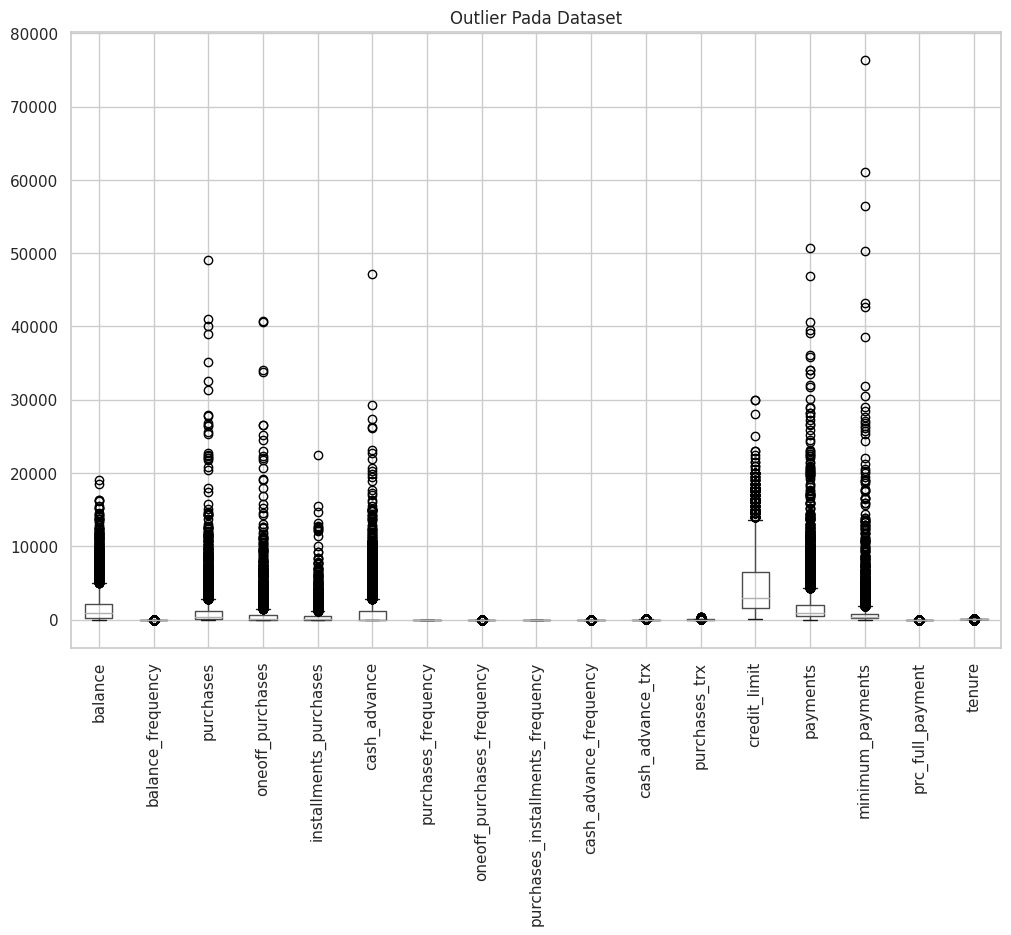

In [29]:
# Mendeteksi outlier
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Outlier Pada Dataset')
plt.xticks(rotation=90)
plt.show()

### 5.3.1 Penanganan dengan IQR

In [30]:
# Menghapus outlier menggunakan metode IQR (Interquartile Range)
# Menghitung nilai kuartil pertama (Q1) dan kuartil ketiga (Q3)
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

# Menghitung rentang IQR (Interquartile Range)
iqr = q3 - q1

# Menentukan batas ambang untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identifikasi data yang di luar batas ambang sebagai outlier
outlier_iqr = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

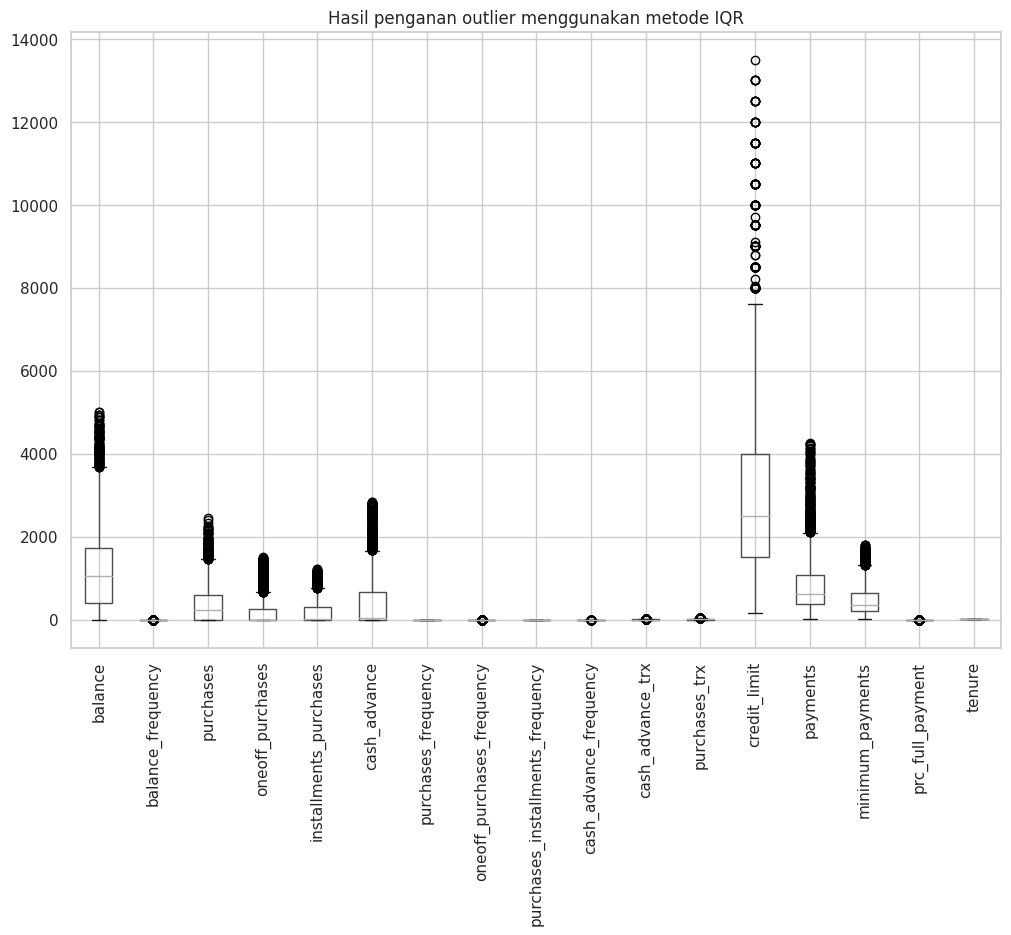

In [31]:
plt.figure(figsize=(12, 8))
outlier_iqr.boxplot()
plt.title('Hasil penganan outlier menggunakan metode IQR')
plt.xticks(rotation=90)
plt.show()

In [32]:
print("Data frame Sebelum Outlier di hapus : ", df.shape)
print("Data frame Sesudah Outlier di hapus: ", outlier_iqr.shape)
print()

# Selisih jumlah baris
selisih = df.shape[0] - outlier_iqr.shape[0]
persentase_terhapus = ((df.shape[0] - outlier_iqr.shape[0]) / df.shape[0]) * 100

print(f"Selisih jumlah baris: {selisih}")
print(f"Persentase data yang terhapus: {persentase_terhapus:.2f}%")

Data frame Sebelum Outlier di hapus :  (8636, 17)
Data frame Sesudah Outlier di hapus:  (2951, 17)

Selisih jumlah baris: 5685
Persentase data yang terhapus: 65.83%


### 5.3.2 Penanganan dengan Z-score

In [33]:
# Menghitung Z-score untuk setiap kolom
z_scores = df.apply(lambda x: (x - x.mean()) / x.std())

# Menentukan ambang batas Z-score untuk mengidentifikasi outlier
z_score_threshold = 3

# Mengidentifikasi outlier berdasarkan Z-score
outliers = df[z_scores.abs() > z_score_threshold]

# Menghapus outlier
df_z = df[(np.abs(z_scores) <= z_score_threshold).all(axis=1)]

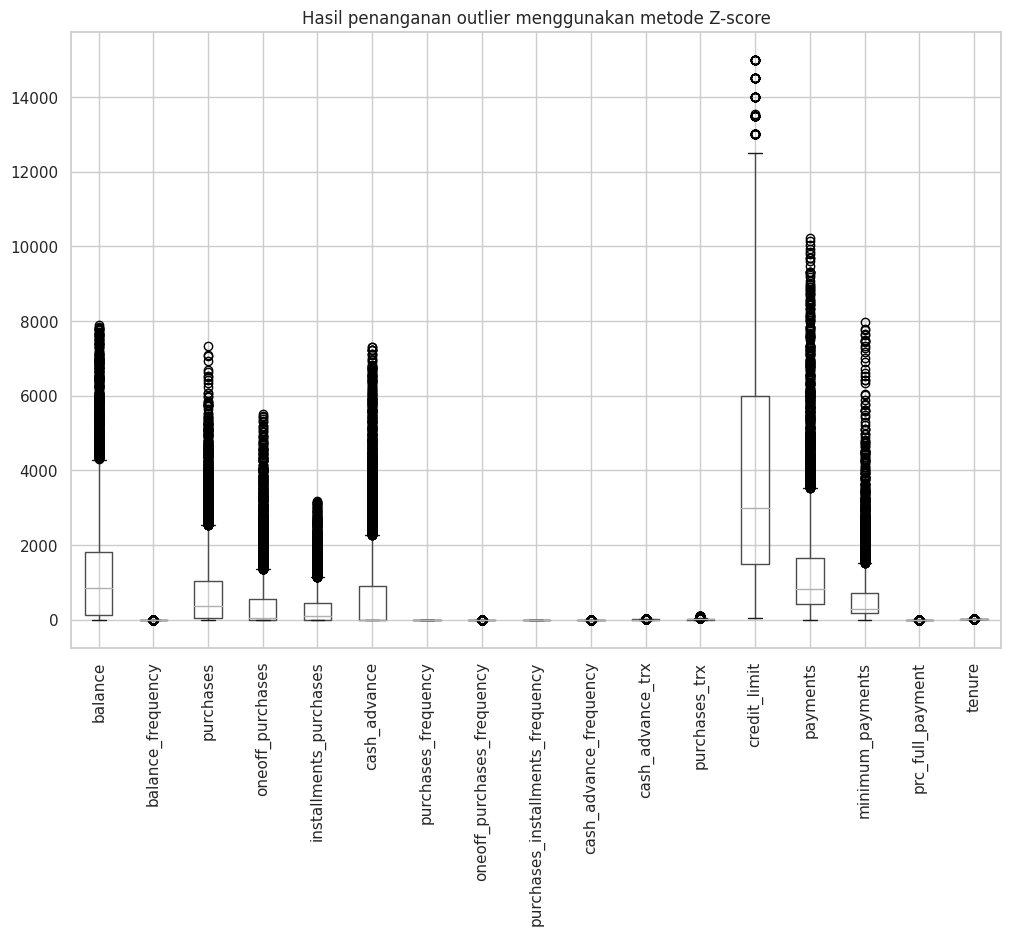

In [34]:
plt.figure(figsize=(12, 8))
df_z.boxplot()
plt.title('Hasil penanganan outlier menggunakan metode Z-score')
plt.xticks(rotation=90)
plt.show()

In [35]:
print("Data frame Sebelum Outlier di hapus : ", df.shape)
print("Data frame Sesudah Outlier di hapus: ", df_z.shape)

Data frame Sebelum Outlier di hapus :  (8636, 17)
Data frame Sesudah Outlier di hapus:  (7190, 17)


In [36]:
# Selisih jumlah baris
selisih = df.shape[0] - df_z.shape[0]
persentase_terhapus = ((df.shape[0] - df_z.shape[0]) / df.shape[0]) * 100

print(f"Selisih jumlah baris: {selisih}")
print(f"Persentase data yang terhapus: {persentase_terhapus:.2f}%")

Selisih jumlah baris: 1446
Persentase data yang terhapus: 16.74%


Dikarenakan presentase penhapusan outlier lebih dengan memakai z_score, maka dataset hasil z_score yang dipakai untuk memasuki tahap selanjutnya

In [37]:
df_z.head(3)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


## 5.4 Standarisasi data


In [38]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_z)

In [39]:
df_scaled = pd.DataFrame(scaled, columns=df_z.columns)
df_scaled.head(3)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.824859,-0.471098,-0.648317,-0.546783,-0.457754,-0.548419,-0.825388,-0.674657,-0.714812,-0.699732,-0.589346,-0.675447,-1.022285,-0.783455,-0.573182,-0.536968,0.310949
1,1.237850,0.015621,-0.740038,-0.546783,-0.643143,4.594878,-1.245685,-0.674657,-0.926316,0.851936,0.395008,-0.805885,1.005652,1.922783,0.603055,0.226610,0.310949
2,0.776372,0.502340,0.003318,0.416138,-0.643143,-0.548419,1.276090,2.780218,-0.926316,-0.699732,-0.589346,-0.023257,1.174646,-0.491922,0.041870,-0.536968,0.310949


# 6. Modelling

Model yang akan digunakan adalah K-Means Clustering. K-Means dalah algoritma unsupervised learning yang mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda berdasarkan kesamaan tertentu.

## 6.1 Menentukan jumlah cluster dengan elbow

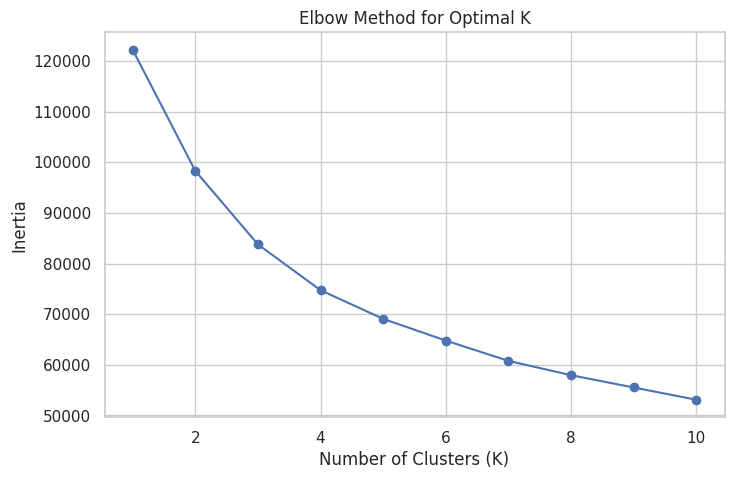

In [40]:
# Menentukan jumlah cluster yang akan diuji
num_clusters = range(1, 11)

# Menyimpan inersia untuk setiap jumlah cluster
inertia = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Membuat plot elbow
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

## 6.2 Menentukan jumlah cluster dengan silhouette

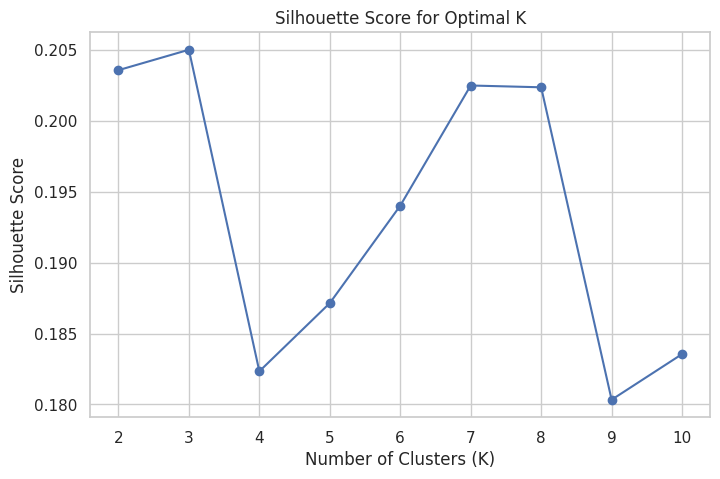

In [41]:
# Menentukan jumlah cluster yang akan diuji
num_clusters = range(2, 11)

# Menyimpan silhouette score untuk setiap jumlah cluster
silhouette_scores = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    # Menghitung silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Membuat plot silhouette score
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [42]:
# Membuat DataFrame dari hasil Silhouette Score
silhouette_df = pd.DataFrame({
    'Number of Clusters (K)': num_clusters,
    'Silhouette Score': silhouette_scores
})

# Menampilkan DataFrame
print(silhouette_df)

   Number of Clusters (K)  Silhouette Score
0                       2          0.203586
1                       3          0.205026
2                       4          0.182337
3                       5          0.187149
4                       6          0.194024
5                       7          0.202503
6                       8          0.202377
7                       9          0.180332
8                      10          0.183553


Berdasarkan hasil dari metode elbow dan silhouette didapatkan nilai k=3.

Pada metode elbow penurunan Inertia cukup signifikan hingga jumlah cluster 3 atau 4, namun setelah itu keuntungannya mulai berkurang.

Pada metode silhouette score mencapai puncaknya pada jumlah cluster 3, yang menunjukkan bahwa konfigurasi dengan 3 cluster memberikan pembagian yang lebih baik dibandingkan dengan konfigurasi lainnya.

## 6.3 Pengaplikasian algoritma K-Means

In [43]:
x = df_scaled.values
km = KMeans(n_clusters=3, random_state=42)
y_pred = km.fit_predict(x)

In [44]:
y_pred

array([1, 2, 0, ..., 1, 1, 1], dtype=int32)

In [45]:
df_kmean= df_scaled.copy()
df_kmean['cluster']= km.labels_

df_kmean

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,-0.824859,-0.471098,-0.648317,-0.546783,-0.457754,-0.548419,-0.825388,-0.674657,-0.714812,-0.699732,-0.589346,-0.675447,-1.022285,-0.783455,-0.573182,-0.536968,0.310949,1
1,1.237850,0.015621,-0.740038,-0.546783,-0.643143,4.594878,-1.245685,-0.674657,-0.926316,0.851936,0.395008,-0.805885,1.005652,1.922783,0.603055,0.226610,0.310949,2
2,0.776372,0.502340,0.003318,0.416138,-0.643143,-0.548419,1.276090,2.780218,-0.926316,-0.699732,-0.589346,-0.023257,1.174646,-0.491922,0.041870,-0.536968,0.310949,0
3,-0.318040,0.502340,-0.724655,-0.526856,-0.643143,-0.548419,-1.035538,-0.386752,-0.926316,-0.699732,-0.589346,-0.740666,-0.954688,-0.452890,-0.440429,-0.536968,0.310949,1
4,0.329247,0.502340,0.541830,-0.546783,1.947792,-0.548419,0.435499,-0.674657,0.554221,-0.699732,-0.589346,-0.284133,-0.751894,0.047761,2.286282,-0.536968,0.310949,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7185,-0.772407,-0.836138,-0.369634,-0.066973,-0.643143,-0.413067,0.015203,1.052780,-0.926316,0.076102,0.148920,-0.349352,-1.191280,-0.855305,-0.605418,-0.536968,-4.732982,1
7186,-0.815564,-0.166899,-0.583025,-0.546783,-0.325786,-0.548419,0.960868,-0.674657,0.977232,-0.699732,-0.589346,-0.349352,-1.022285,-0.880004,-0.610921,-0.536968,-4.732982,1
7187,-0.284366,-0.836138,-0.740038,-0.546783,-0.643143,0.372740,-1.245685,-0.674657,-0.926316,0.076102,0.148920,-0.805885,-0.954688,-0.818865,-0.322915,-0.536968,-4.732982,1
7188,-0.761675,0.502340,-0.316043,-0.546783,0.213843,-0.548419,0.645647,-0.674657,0.659974,-0.699732,-0.589346,-0.414571,-1.022285,-0.806036,-0.591932,-0.536968,-4.732982,1


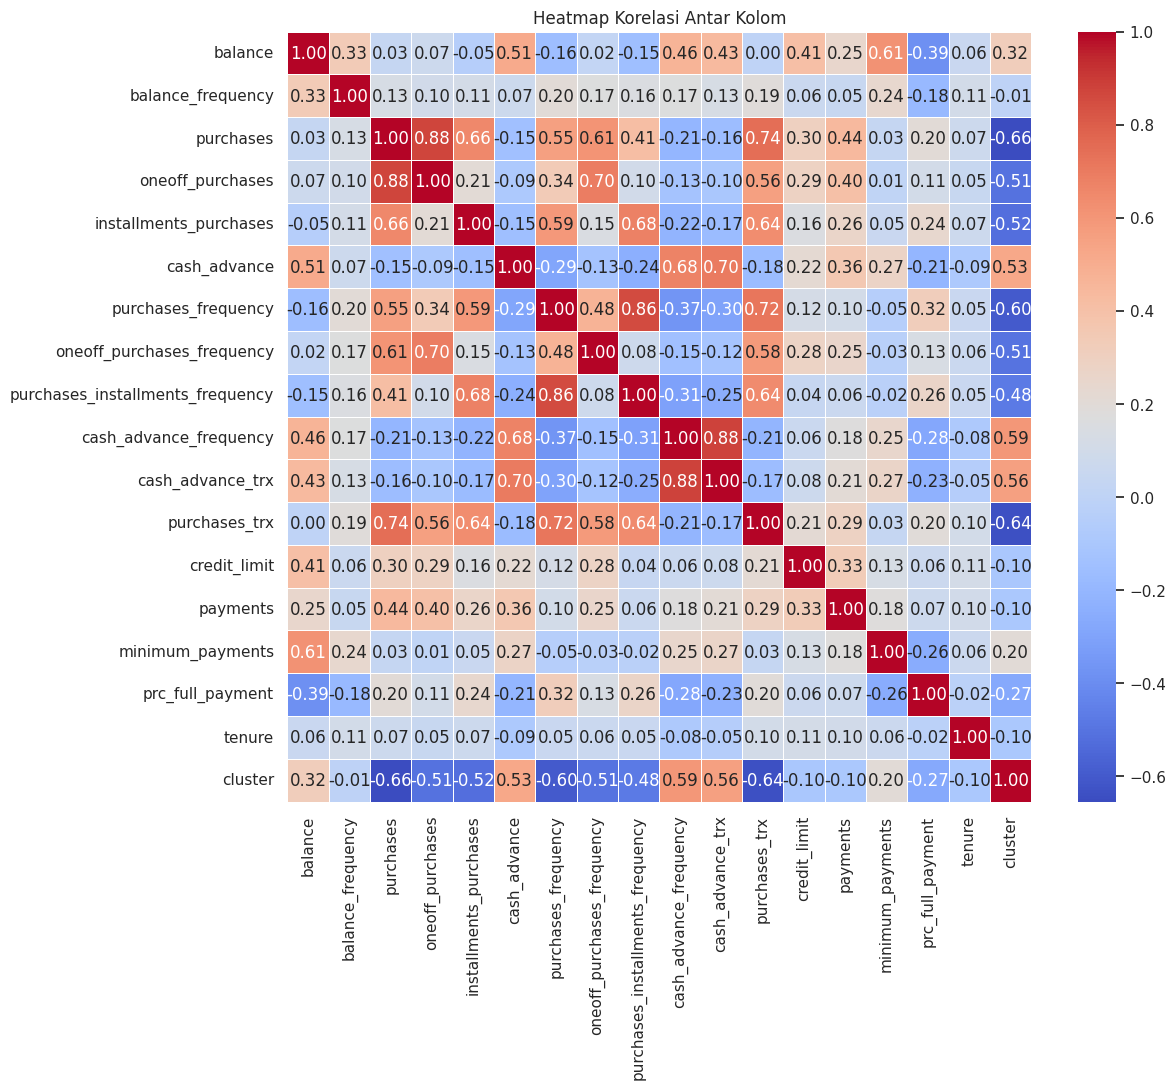

In [46]:
# Menghitung matriks korelasi
correlation_matrix = df_kmean.corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Kolom")
plt.show()

# 7. Evaluasi

In [47]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_km = silhouette_score(x, df_kmean['cluster'])
ch_km = calinski_harabasz_score(x, df_kmean['cluster'])
db_km = davies_bouldin_score(x, df_kmean['cluster'])

print('sil_km', sil_km)
print('ch_km' ,ch_km)
print('db_km',db_km)

sil_km 0.20502582751116086
ch_km 1649.1830153914284
db_km 1.6581971745508772


Silhouette Score (sil_km): Nilai Silhouette Score berkisar antara -1 hingga 1. Semakin tinggi nilainya, semakin baik pemisahan antar klaster. Nilai 0 menunjukkan adanya tumpang tindih antar klaster. Nilai 0.20502582751116086 menunjukkan bahwa terdapat sejumlah pemisahan antar klaster, tetapi mungkin masih ada sejumlah tumpang tindih. Ini adalah nilai positif, yang menunjukkan adanya struktur klaster yang cukup baik.

Calinski-Harabasz Index (ch_km): Nilai CH Index lebih tinggi menunjukkan bahwa klaster-klasternya lebih baik dipisahkan satu sama lain. Namun, interpretasi nilai ini bergantung pada konteks data tertentu. Nilai 1649.1830153914284 menunjukkan bahwa pemisahan antar klaster relatif baik, tetapi nilai ini harus diinterpretasikan bersama dengan pemahaman tentang data dan tujuan analisis.

Davies-Bouldin Index (db_km): Nilai DB Index yang lebih rendah menunjukkan klaster-klasternya lebih baik terdefinisi dan terpisah satu sama lain. Nilai 1.6581971745508772 menunjukkan tingkat pemisahan klaster yang cukup baik. Nilai ini juga perlu diinterpretasikan dalam konteks data dan tujuan analisis.

Text(0.5, 1.0, 'BALANCE VS PURCHASES')

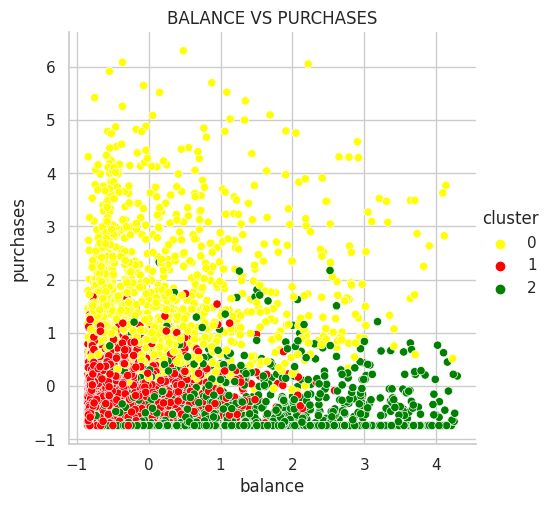

In [48]:
import seaborn as sns
sns.relplot(x='balance', y='purchases',
            data=df_kmean, hue='cluster', palette=['yellow','red','green'])

plt.title('BALANCE VS PURCHASES')

dari perbandingan Balance Vs Purchases diperoleh bahwa

* klaster 0 merupakan customer yang banyak melakukan pembelian juga saldo tinggi.
* klaster 1 merupakan customer yang memiliki saldo tinggi namun tidak banyak melakukan pembelian.
* Klaster 2 dan klaster 3 merupakan orang yang tidak banyak memiliki saldo dan tidak banyak melakukan pembelian juga.

Text(0.5, 1.0, 'balance VS payments')

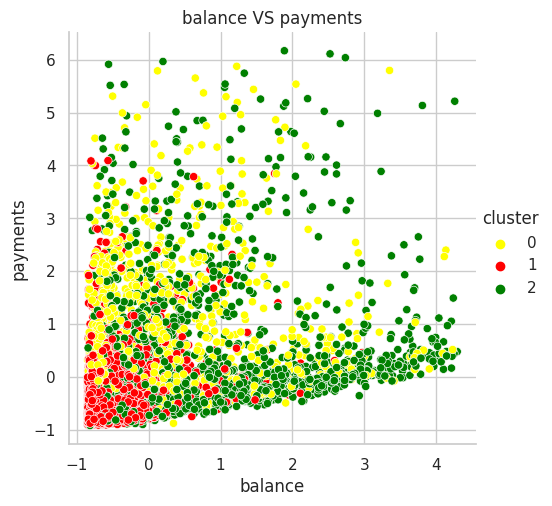

In [49]:
import seaborn as sns
sns.relplot(x='balance', y='payments',
            data=df_kmean, hue='cluster', palette=['yellow','red','green'])

plt.title('balance VS payments')

dari perbandingan Balance dan Payments diperoleh bahwa

* klaster 0 dan 1 merupakan customer dengan saldo tinggi yang banyak melakukan pembayaran.
* klaster 2 merupakan customer yang tidak memiliki banyak saldo dan tidak melakukan banyak pembayaran.

In [50]:
from sklearn.decomposition import PCA

# Pilih jumlah komponen utama yang diinginkan (contoh: 2 komponen)
n_components = 2
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_scaled)

In [51]:
# Buat DataFrame baru dengan hasil PCA
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
df_pca

,PC1,PC2
0,-1.303382,-2.126300
1,-2.850911,3.159035
2,1.182417,0.535918
3,-1.438825,-1.535478
4,0.832786,0.160697
...,...,...
7185,-0.979299,-1.426283
7186,-0.183627,-2.286288
7187,-2.566232,-1.280477
7188,-0.118862,-2.006004


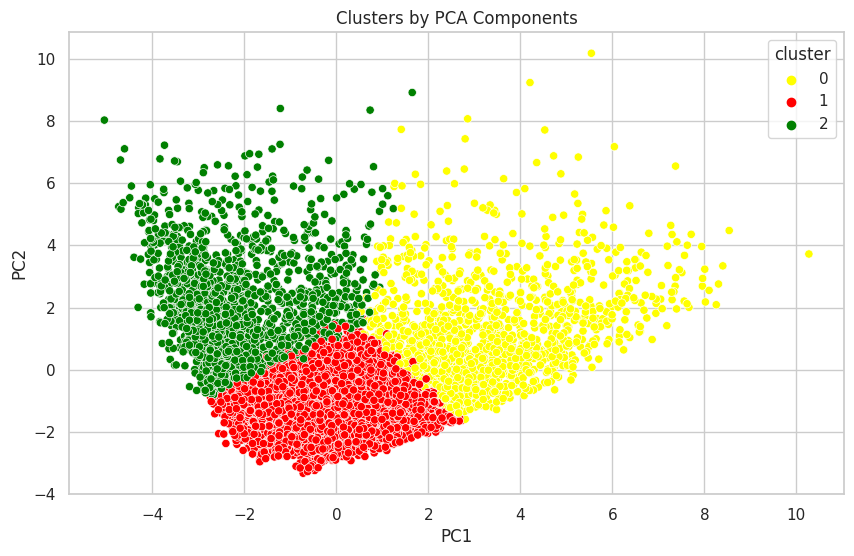

In [52]:
x_axis = df_pca['PC1']
y_axis = df_pca['PC2']
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_kmean['cluster'], palette=['yellow','red','green'])
plt.title('Clusters by PCA Components')
plt.show()

# Model Inference

In [68]:
# Inisiai data
data_baru = [[2772.772734,	1.0,	0.0,	0.0,	0.0,	346.81139,	0.0,	0.0,	0.0,	0.083333,	1,	0,	3000.0,	805.647974,	989.962866,	0.0,	12]]

data_baru = pd.DataFrame(data_baru, columns=df_z.columns)

# Scale data
data_baru_scaled = scaler.transform(data_baru)

# Predict data
pred = km.predict(data_baru)

print(f'Cluster: {pred}')

Cluster: [2]
